In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_style("white")
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('df_english_2.csv')

In [3]:
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Clean_texts,is_english
0,0,86ff1ea1-0b63-43ce-addc-eb43f6193b3b,Yaseen Yaseen,https://play-lh.googleusercontent.com/a/ALm5wu...,Yaeen Yaeen gg,5,0,NaN,2022-10-04 20:32:28,NaN,NaN,been been go,True
1,1,3577f7a1-3394-4e77-813d-095a82cf8bcf,Kemar Richardson,https://play-lh.googleusercontent.com/a-/ACNPE...,Great,5,0,26.3.4,2022-10-04 20:32:10,NaN,NaN,great,True
2,2,7c8c56d9-d8ad-47d4-b24b-5289aa4529ff,Tracy Dunn,https://play-lh.googleusercontent.com/a/ALm5wu...,good,5,0,26.4.3,2022-10-04 20:31:21,NaN,NaN,good,True
3,3,80db804f-cccd-4b09-b690-abc12cbf0612,SG. Mugo. (Mugoz:),https://play-lh.googleusercontent.com/a-/ACNPE...,Good app,5,0,26.3.4,2022-10-04 20:30:22,NaN,NaN,good app,True
4,4,4ed35e90-0f45-4865-81c4-b3a6f2ea49f7,Mwansa Judy,https://play-lh.googleusercontent.com/a-/ACNPE...,Most amazing app,5,0,26.3.4,2022-10-04 20:29:25,NaN,NaN,amazing app,True


In [4]:
df = df[df['Clean_texts'].notna()]

In [5]:
df.drop(columns=['Unnamed: 0', 'reviewId', 'userName', 'userImage', 'at'])

,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,repliedAt,Clean_texts,is_english
0,Yaeen Yaeen gg,5,0,NaN,NaN,NaN,been been go,True
1,Great,5,0,26.3.4,NaN,NaN,great,True
2,good,5,0,26.4.3,NaN,NaN,good,True
3,Good app,5,0,26.3.4,NaN,NaN,good app,True
4,Most amazing app,5,0,26.3.4,NaN,NaN,amazing app,True
...,...,...,...,...,...,...,...,...
99995,Best app in pakistan 🇵🇰 tik toker Soham anwar ...,5,1,25.8.5,NaN,NaN,best app pakistan tik toker sham anwar thanks,True
99996,Perfect,4,0,25.9.4,NaN,NaN,perfect,True
99997,So nice,5,1,25.8.5,NaN,NaN,nice,True
99998,It's a great app,5,1,25.8.5,NaN,NaN,great app,True


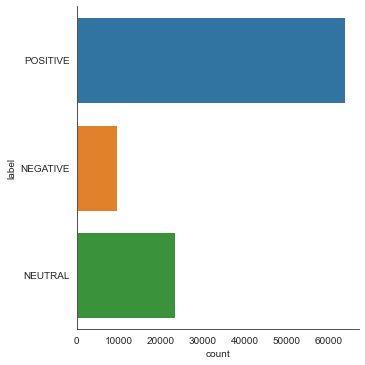

In [9]:
df['label'].value_counts()
sb.catplot(y = "label", data = df, kind = "count")

([<matplotlib.patches.Wedge at 0x204e8eacbb0>,
 [Text(-0.5730447413217908, 1.0543337822736412, 'POSITIVE'),
  Text(0.2025570728689852, -1.081189452515492, 'NEUTRAL'),
  Text(1.0466740252084437, -0.33833930447696214, 'NEGATIVE')],
 [Text(-0.33427609910437794, 0.615028039659624, '65.8%'),
  Text(0.11048567611035555, -0.5897397013720864, '24.2%'),
  Text(0.570913104659151, -0.1845487115328884, '10.0%')])

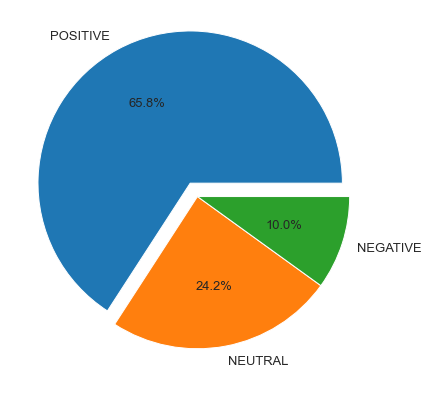

In [15]:
dflabels= df['label'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(dflabels.values, labels = dflabels.index, explode = (0.1, 0, 0), autopct='%1.1f%%', textprops={'fontsize': 13}, shadow=False)

In [16]:
# WORD-COUNT
df['word_count'] = df['Clean_texts'].apply(lambda x: len(str(x).split()))
print(df[df['label']=='POSITIVE']['word_count'].mean())
print(df[df['label']=='NEGATIVE']['word_count'].mean())
print(df[df['label']=='NEUTRAL']['word_count'].mean())

7.079068092501839
20.088159121516625
4.614893073187356


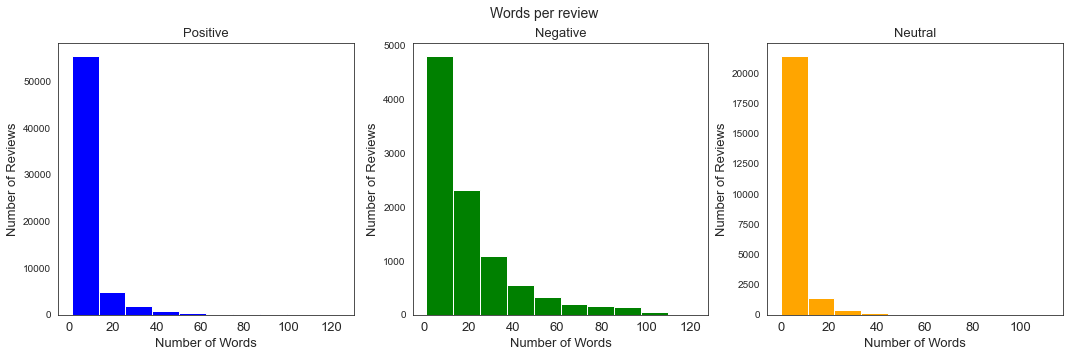

In [30]:
fig , (ax1, ax2, ax3) =plt.subplots(1,3,figsize=(18,5))
train_words=df[df['label']=='POSITIVE']['word_count']
ax1.hist(train_words,color='blue')
ax1.set_title('Positive', fontsize=13)
ax1.set_xlabel('Number of Words', fontsize=13)
ax1.set_ylabel('Number of Reviews', fontsize=13)
ax1.tick_params(axis="x", labelsize=13) 


train_words=df[df['label']=='NEUTRAL']['word_count']
ax3.hist(train_words,color='orange')
ax3.set_title('Neutral', fontsize=13)
ax3.set_xlabel('Number of Words', fontsize=13)
ax3.set_ylabel('Number of Reviews', fontsize=13)
ax3.tick_params(axis="x", labelsize=13) 

train_words=df[df['label']=='NEGATIVE']['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Negative', fontsize=13)
ax2.set_xlabel('Number of Words', fontsize=13)
ax2.set_ylabel('Number of Reviews', fontsize=13)
ax2.tick_params(axis="x", labelsize=13) 

fig.suptitle('Words per review', fontsize=14)
plt.show()

In [31]:

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [ ]:
def finalpreprocess(string):
    return lemmatizer(stopword((string))
df['final_text'] = df['Clean_texts'].apply(lambda x: finalpreprocess(x))

In [9]:
df['clean_text_tok']=[nltk.word_tokenize(i) for i in df['final_text']]

In [33]:
corpus=[]
new= df['final_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

In [34]:
corpus

['great',
 'good',
 'good',
 'app',
 'amaze',
 'app',
 'full',
 'entertainment',
 'nice',
 'app',
 'super',
 'good',
 'app',
 'tiktok',
 'warn',
 'video',
 'view',
 'problem',
 'id',
 'manimeraj',
 'server',
 'nepal',
 'tiktok',
 'tiktok',
 'nice',
 'app',
 'need',
 'tik',
 'tok',
 'open',
 'note',
 'enjoy',
 'see',
 'video',
 'follow',
 'friend',
 'favorite',
 'video',
 'wow',
 'love',
 'tiktok',
 'great',
 'app',
 'dont',
 'know',
 'whats',
 'go',
 'anymore',
 'cause',
 'cant',
 'download',
 'tik',
 'tok',
 'anymore',
 'must',
 'download',
 'tik',
 'tok',
 'lite',
 'awesome',
 'app',
 'ive',
 'ever',
 'best',
 'really',
 'like',
 'titok',
 'fun',
 'make',
 'videos',
 'keep',
 'banneding',
 'videosand',
 'keep',
 'start',
 'make',
 'videos',
 'account',
 'tiktok',
 'warn',
 'problem',
 'bangladesh',
 'tiktok',
 'amaze',
 'love',
 'amazing',
 'good',
 'good',
 'amaze',
 'app',
 'havent',
 'see',
 'problem',
 'last',
 'day',
 'face',
 'issue',
 'show',
 'capcut',
 'edit',
 'effect',
 's

In [35]:
from collections import Counter
words_counts = Counter(corpus)

In [36]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

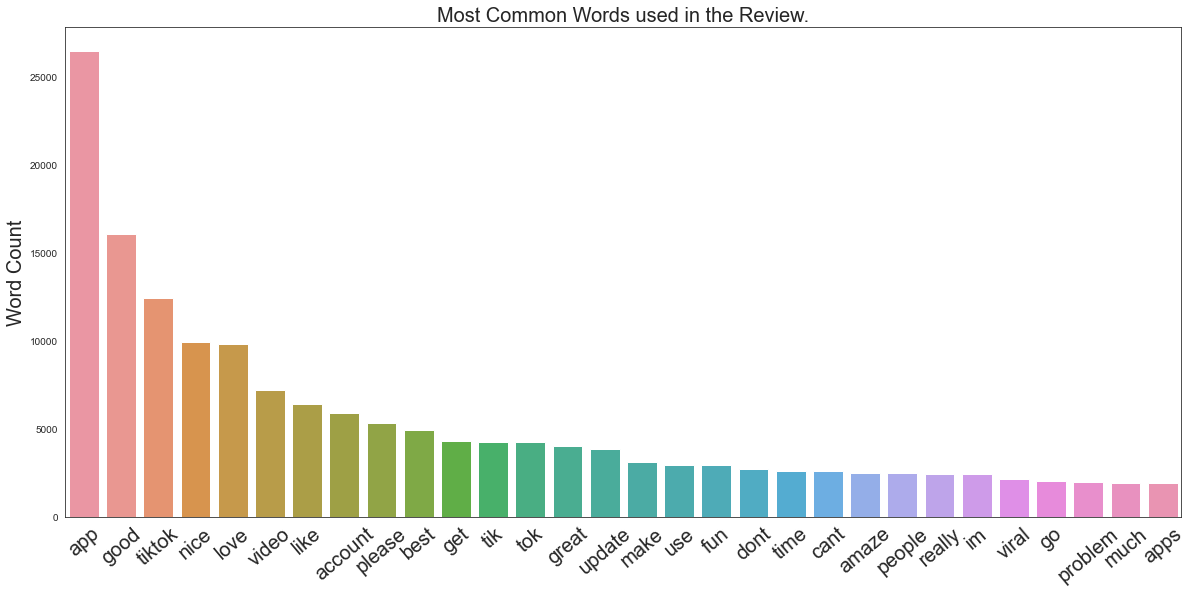

In [37]:
plt.figure(figsize=(20,9))
plot = sb.barplot(np.arange(30), most_commmom_CountList[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList[0:30], fontsize=20, rotation=40)
plt.title('Most Common Words used in the Review.', fontsize=20)
plt.show()

In [38]:
dfpos = df[df["label"]=="POSITIVE"]
dfneu = df[df["label"]=="NEUTRAL"]
dfneg = df[df["label"]=="NEGATIVE"]

In [39]:
corpus2=[]
new2= dfpos['final_text'].str.split()
new2=new2.values.tolist()
corpus2=[word for i in new2 for word in i]

In [40]:
corpus3=[]
new3= dfneu['final_text'].str.split()
new3=new3.values.tolist()
corpus3=[word for i in new3 for word in i]

In [41]:
corpus4=[]
new4= dfneg['final_text'].str.split()
new4=new4.values.tolist()
corpus4=[word for i in new4 for word in i]

In [42]:
words_counts2 = Counter(corpus2)
words_counts3 = Counter(corpus3)
words_counts4 = Counter(corpus4)

In [43]:
most_common_words2 = sorted(words_counts2.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList2 = []
most_commmom_CountList2 = []
for x, y in most_common_words2:
    most_commmom_wordList2.append(x)
    most_commmom_CountList2.append(y)

In [44]:
most_common_words3 = sorted(words_counts3.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList3 = []
most_commmom_CountList3 = []
for x, y in most_common_words3:
    most_commmom_wordList3.append(x)
    most_commmom_CountList3.append(y)

In [45]:
most_common_words4 = sorted(words_counts4.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList4 = []
most_commmom_CountList4 = []
for x, y in most_common_words4:
    most_commmom_wordList4.append(x)
    most_commmom_CountList4.append(y)

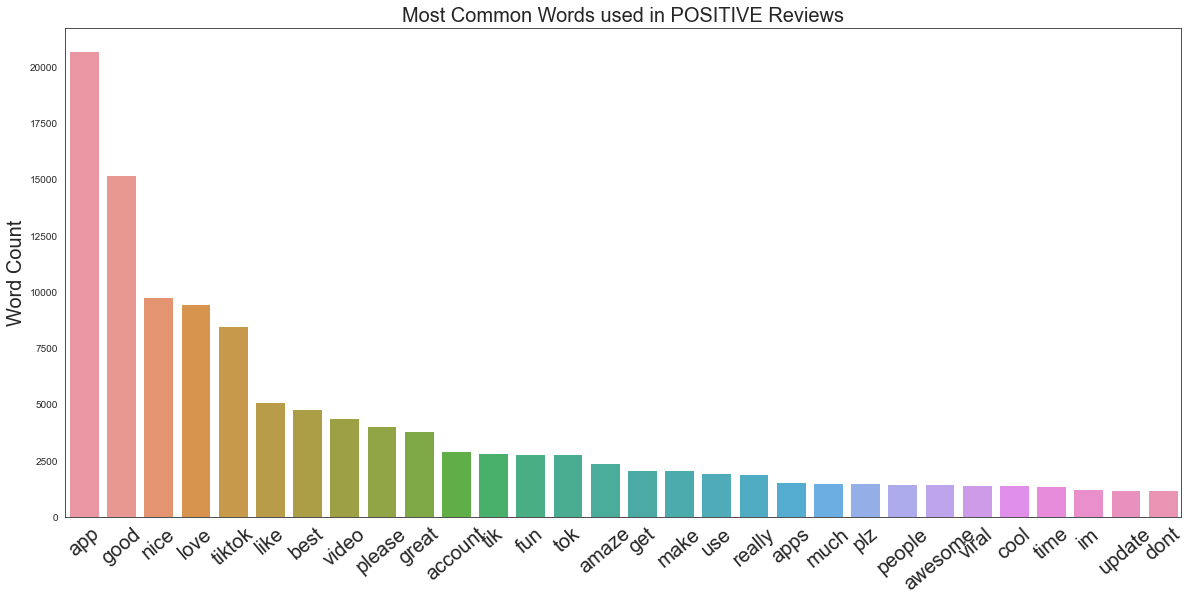

In [46]:
plt.figure(figsize=(20,9))
plot2 = sb.barplot(np.arange(30), most_commmom_CountList2[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList2[0:30], fontsize=20, rotation=40)
plt.title('Most Common Words used in POSITIVE Reviews', fontsize=20)
plt.show()

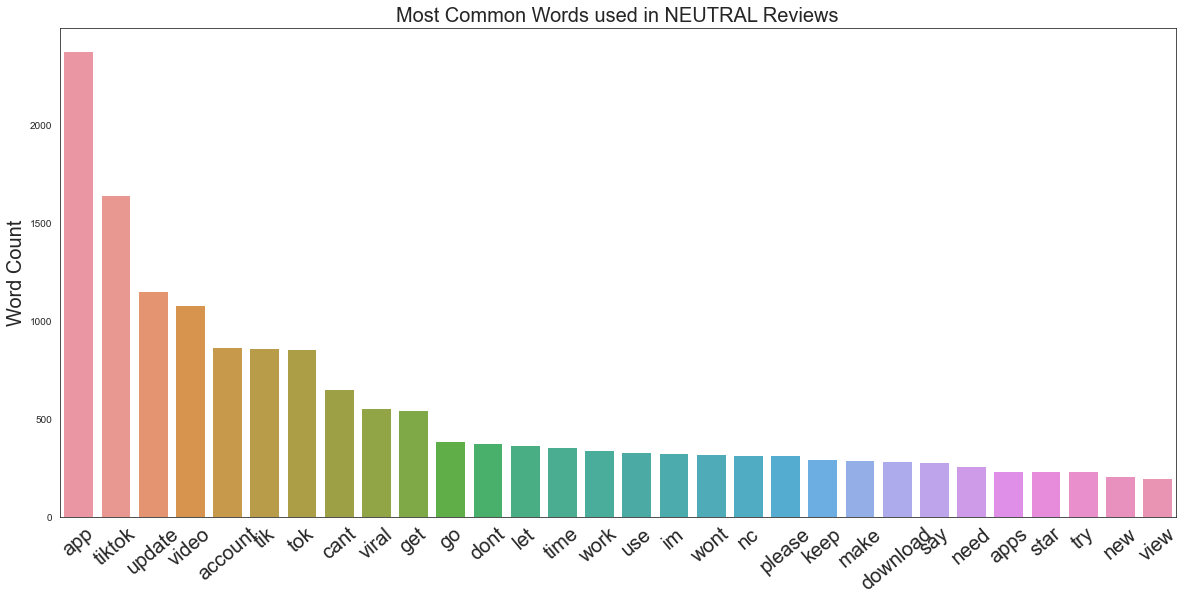

In [47]:
plt.figure(figsize=(20,9))
plot = sb.barplot(np.arange(30), most_commmom_CountList3[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList3[0:30], fontsize=20, rotation=40)
plt.title('Most Common Words used in NEUTRAL Reviews', fontsize=20)
plt.show()

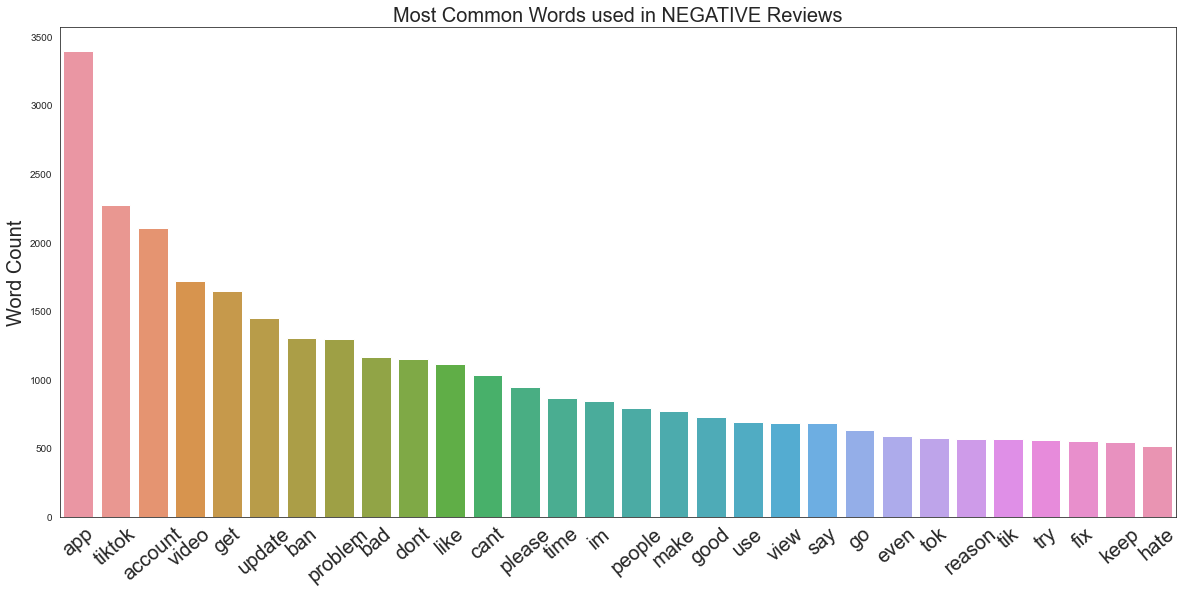

In [48]:
plt.figure(figsize=(20,9))
plot = sb.barplot(np.arange(30), most_commmom_CountList4[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList4[0:30], fontsize=20, rotation=40)
plt.title('Most Common Words used in NEGATIVE Reviews', fontsize=20)
plt.show()

In [16]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [20]:
from wordcloud import WordCloud, STOPWORDS

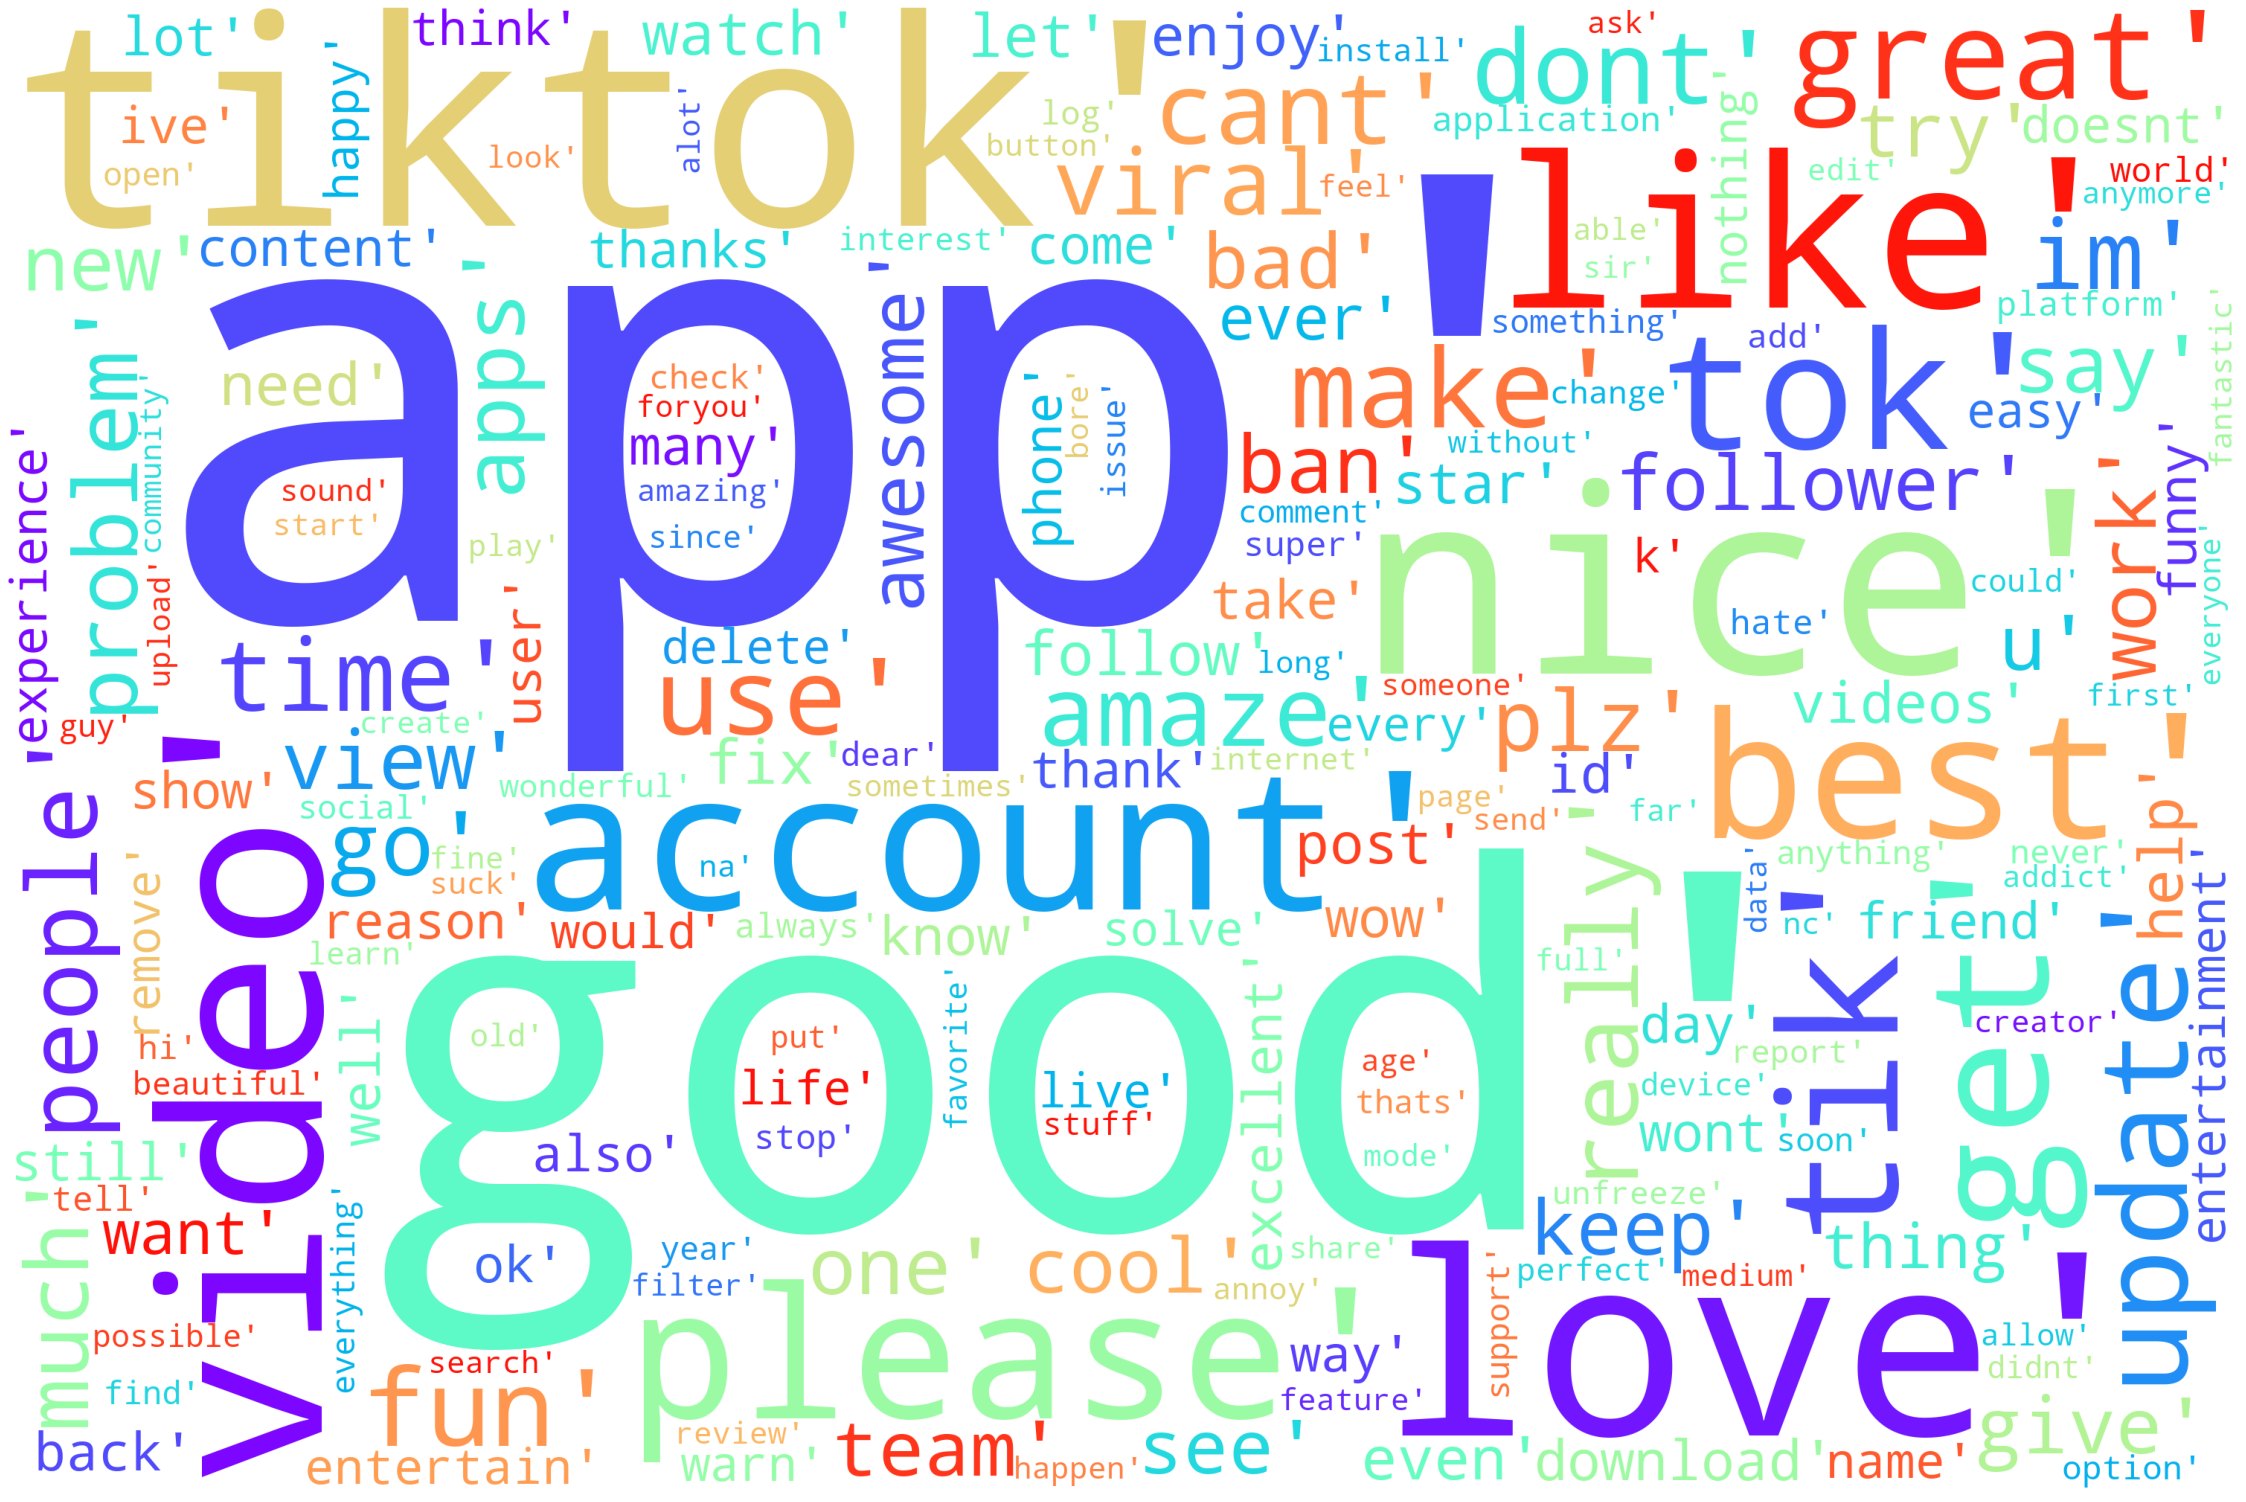

In [31]:
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, colormap='rainbow', background_color='white', collocations=False, stopwords = STOPWORDS).generate(str(corpus))
# Plot
plot_cloud(wordcloud)